## Extracting Axis

In [16]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [18]:
## Extracting Axis

In [19]:
class Line():
  def __init__(self, x1, y1, x2, y2):
    self.x1 = x1
    self.y1 = y1
    self.x2 = x2
    self.y2 = y2

img = cv2.imread('line.png')
img = cv2.resize(img, (1920, 1080))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  
theta = np.pi / 180  
threshold = 50 
min_line_length = 700
max_line_gap = 50 
line_image = np.copy(img) * 0 

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
points = []
vertical_lines_coordinates = []
horizontal_lines_coordinates = []
for line in lines:
    for x1, y1, x2, y2 in line:
      if x2 - x1 == 0.0:
        # Vertical Line
        points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
        vertical_lines_coordinates.append(Line(x1, y1, x2, y2))
      elif y2 - y1 == 0.0:
        # Horizontal Line
        horizontal_lines_coordinates.append(Line(x1, y1, x2, y2))
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

135 135 920 120


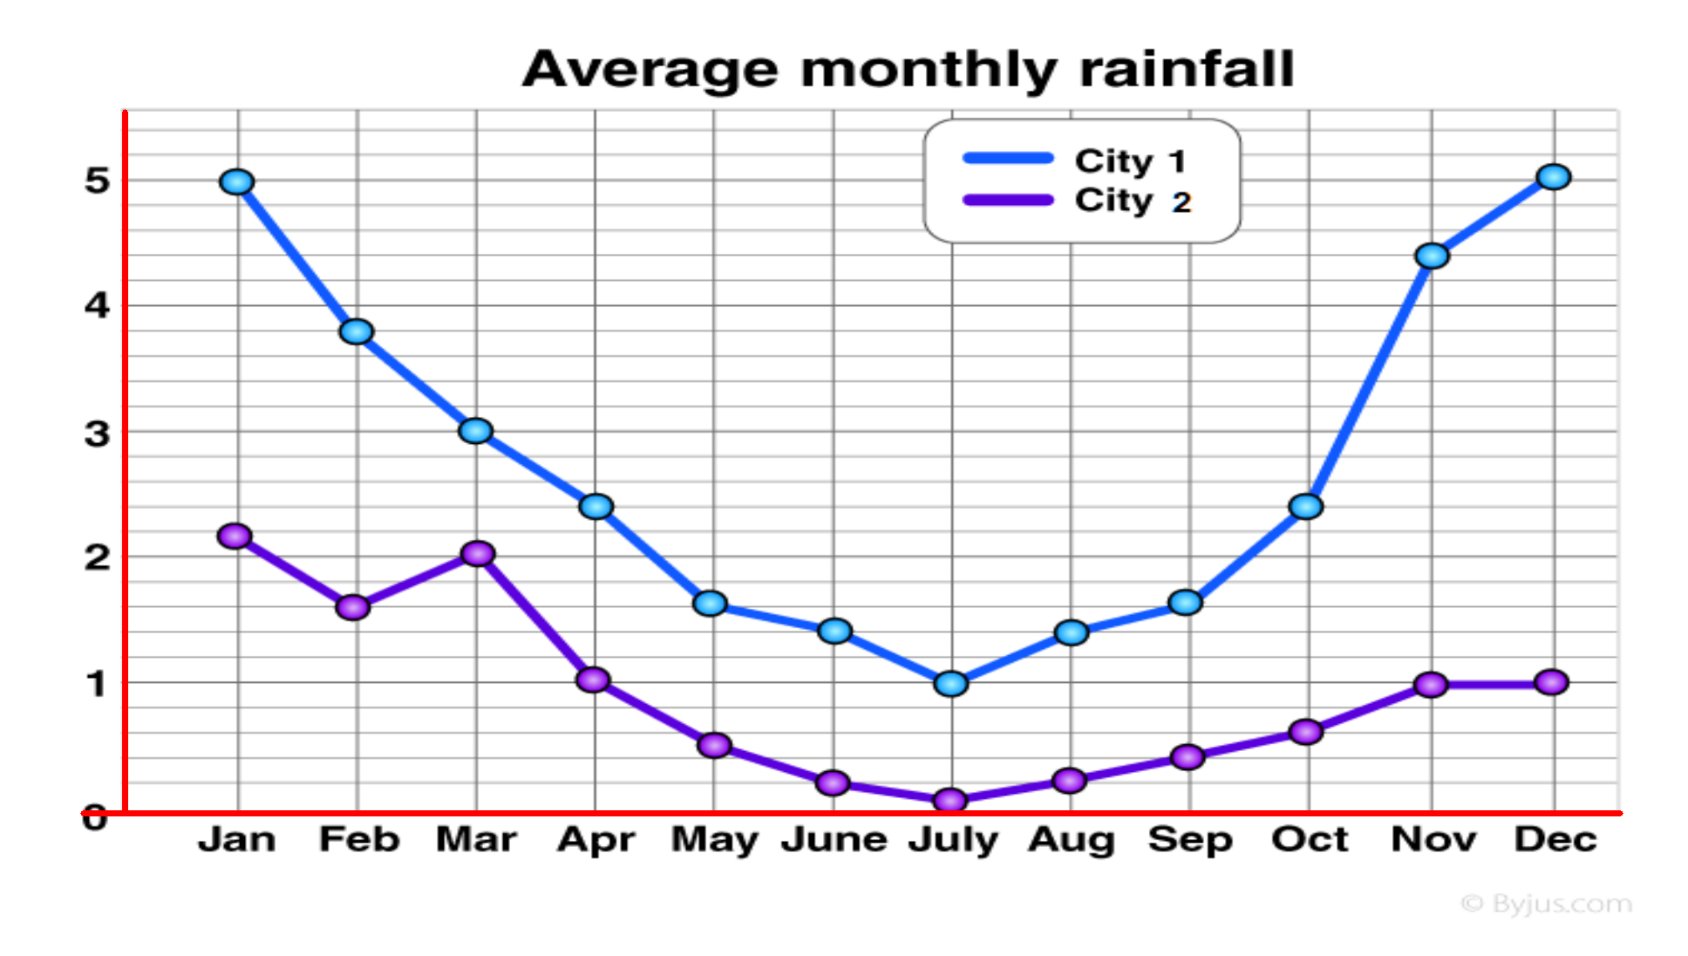

In [20]:
least_vertical_index = 0
least_vertical = vertical_lines_coordinates[0]
max_vertical_height = 0
for i in range(1, len(vertical_lines_coordinates)):
  if vertical_lines_coordinates[i].x1 < least_vertical.x1:
    if abs(vertical_lines_coordinates[i].y1 - vertical_lines_coordinates[i].y2) > max_vertical_height:
      least_vertical = vertical_lines_coordinates[i]
      least_vertical_index = i
      max_vertical_height = abs(vertical_lines_coordinates[i].y1 - vertical_lines_coordinates[i].y2)


max_horizontal_index = 0
max_horizontal = horizontal_lines_coordinates[0]
max_horizontal_width = abs(horizontal_lines_coordinates[0].x1 - horizontal_lines_coordinates[0].x2)
for i in range(1, len(horizontal_lines_coordinates)):
  if horizontal_lines_coordinates[i].y1 > least_vertical.y1:
    if abs(horizontal_lines_coordinates[i].x1 - horizontal_lines_coordinates[i].x2) > max_horizontal_width:
      max_horizontal = horizontal_lines_coordinates[i]
      max_horizontal_index = i
      max_horizontal_width = abs(horizontal_lines_coordinates[i].x1 - horizontal_lines_coordinates[i].x2)

img = cv2.imread('line.png')
img = cv2.resize(img, (1920, 1080))
#Drawing vertical line
x1, y1, x2, y2 = vertical_lines_coordinates[least_vertical_index].x1, vertical_lines_coordinates[least_vertical_index].y1, vertical_lines_coordinates[least_vertical_index].x2, vertical_lines_coordinates[least_vertical_index].y2
cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
# Y Ticks
print(x1, x2, y1, y2)
img_y = img[y2:y1, 0:x1-5]

#Drawing horizonatal line
x1, y1, x2, y2 = horizontal_lines_coordinates[max_horizontal_index].x1, horizontal_lines_coordinates[max_horizontal_index].y1, horizontal_lines_coordinates[max_horizontal_index].x2, horizontal_lines_coordinates[max_horizontal_index].y2
cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
# X Ticks
img_x = img[y1+5:, x1:x2]
plt.figure(figsize=(30, 30))
plt.imshow(img)
plt.axis("off")
plt.show()

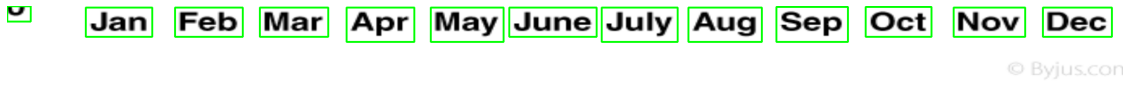

In [21]:
#X Ticks
gray = cv2.cvtColor(img_x, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
im2 = img_x.copy()  
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(20, 20))
plt.imshow(im2)
plt.axis("off")
plt.show()

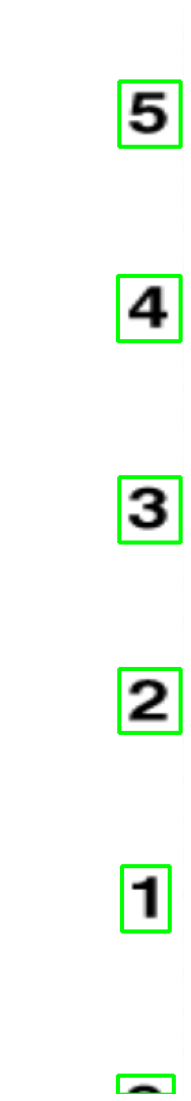

In [22]:
#Y Ticks
gray = cv2.cvtColor(img_y, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
im2 = img_y.copy()  
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(20, 20))
plt.imshow(im2)
plt.axis("off")
plt.show()

In [23]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [24]:

img = cv2.imread("line.png")
img = cv2.resize(img, (1920, 1080))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
  
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
  
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
  
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
im2 = img.copy()
  file = open("recognized.txt", "w+")
file.write("")
file.close()
area = 0
title = 1080
title_rect = [0, 0, 0, 0]
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = im2[y:y + h, x:x + w]      
    cropped_img = Image.fromarray(cropped)
    cropped_img.save("cropped.png")
    img_path = "cropped.png"
    text = pytesseract.image_to_string(Image.open(img_path))
    text_extracted = text.split("\n")
    x_new = []
    for i in text_extracted:
      if i != "" and i != " " and i != "\x0c":
        x_new.append(i)
    if len(x_new) == 0:
      continue
    if y < title:
      title = y
      title_rect = [x, y, x+w, y+h]
    elif y == title:
      if x < title_rect[0]:
        title_rect[0] = x
        title_rect[2]+= w

cv2.rectangle(im2, (title_rect[0], title_rect[1]), (title_rect[2], title_rect[3]), (0, 255, 0), 2)
cropped = im2[title_rect[1]:title_rect[3], title_rect[0]:title_rect[2]]
title_text = pytesseract.image_to_string(Image.fromarray(cropped))
print(title_text)
plt.figure(figsize=(20, 20))
plt.imshow(im2)
plt.show()

IndentationError: ignored